# HW5

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Creating Erdos-Renyi random graphs 

In [49]:
# number of nodes
N = 10
# prob. of picking an edge
p = 0.1

def generate_ER_graph(N,p):
    all_edges = np.array(list(itertools.product(range(N),range(N))))

    # sample edges with probability p
    uni_rand = np.random.uniform(size=N*N)
    tmp_edges = all_edges[np.where(uni_rand < p)]

    # remove self edges
    edges = []
    for edge in tmp_edges:
        if edge[0] == edge[1]:
            pass
        else:
            edges.append(list(edge))

    # build adjacency list
    adj_list = []
    for i in range(N):
        adj_list.append([])

    for edge in edges:
        adj_list[edge[0]].append(edge[1]) 
        adj_list[edge[1]].append(edge[0]) 

    return adj_list

In [ ]:
def is_connected(N,adj_list):
    connected_graph = True
    visited = [False]*N
    for i in range(N):
        visited = [False]*N
        dfs(i,visited,adj_list)
        if False in visited:
            connected_graph = False
    return connected_graph

def dfs(node,visited,adj_list):
    visited[node] = True
    if adj_list[node] == []:
        return
    else:
        for neigh in adj_list[node]:
            if visited[neigh] == False:
                dfs(neigh,visited,adj_list)
            else:
                pass
        return

## Evolution of Model

In [84]:
def evolve_model(x,mu,eps,N,graph_adj_list):
    i = np.random.choice(range(N))
    j = np.random.choice(graph_adj_list[i]) 
    if np.abs(x[i] - x[j]) < eps:
        x[i] = x[i] + mu*(x[j] - x[i])
        x[j] = x[j] + mu*(x[i] - x[j])
    return x

## (a)

In [ ]:
eps_vec = np.linspace(0.05,0.3,6,endpoint=True)

mu = 0.3
N = 100
num_graphs = 100
num_steps = 100*N

mean_table = []
std_table = []
p_vec = [0.1,0.5,0.9]
for p in p_vec:
    mean_vec = []
    std_vec = []
    for eps in eps_vec:
        print(r"p = {:.2f},eps = {:.2f}".format(p,eps))
        # generate graphs
        ER_graphs = []
        num_graphs_iter = 0
        while num_graphs_iter < num_graphs:
            graph_adj_list = generate_ER_graph(N,p)
            if is_connected(N,graph_adj_list):
                ER_graphs.append(graph_adj_list) 
                num_graphs_iter += 1

        num_cluster_vec = []
        # number of iterations for each graph
        num_iter = 25
        for graph in ER_graphs:
            for _ in range(num_iter):
                x = np.random.uniform(size=N)
                for step in range(num_steps):
                    x = evolve_model(x,mu,eps,N,graph)

                freq,bins = np.histogram(x,bins=1000,range=(0,1))
                num_cluster = len(np.nonzero(freq)[0])
                num_cluster_vec.append(num_cluster)

        mean = np.mean(num_cluster_vec)
        std = np.std(num_cluster_vec)
        mean_vec.append(mean)
        std_vec.append(std)
    mean_table.append(mean_vec)
    std_table.append(std_vec)

p = 0.10,eps = 0.05


In [153]:
for i,p in enumerate(p_vec):
    for j,eps in enumerate(eps_vec):
        print(r"p = {:.2f},eps = {:.2f} | mean = {:.3f}, std-dev = {:.3f}".format(p,eps,mean_table[i][j],std_table[i][j]))

p = 0.10,eps = 0.05 | mean = 34.830, std-dev = 5.955
p = 0.10,eps = 0.10 | mean = 10.670, std-dev = 3.763
p = 0.10,eps = 0.15 | mean = 4.820, std-dev = 1.728
p = 0.10,eps = 0.20 | mean = 3.270, std-dev = 1.799
p = 0.10,eps = 0.25 | mean = 2.750, std-dev = 1.545
p = 0.10,eps = 0.30 | mean = 2.250, std-dev = 1.052
p = 0.50,eps = 0.05 | mean = 12.090, std-dev = 1.908
p = 0.50,eps = 0.10 | mean = 5.500, std-dev = 1.221
p = 0.50,eps = 0.15 | mean = 3.770, std-dev = 0.746
p = 0.50,eps = 0.20 | mean = 2.590, std-dev = 0.650
p = 0.50,eps = 0.25 | mean = 2.140, std-dev = 0.510
p = 0.50,eps = 0.30 | mean = 1.870, std-dev = 0.702
p = 0.90,eps = 0.05 | mean = 10.750, std-dev = 1.506
p = 0.90,eps = 0.10 | mean = 5.390, std-dev = 0.904
p = 0.90,eps = 0.15 | mean = 3.610, std-dev = 0.720
p = 0.90,eps = 0.20 | mean = 2.590, std-dev = 0.776
p = 0.90,eps = 0.25 | mean = 2.160, std-dev = 0.463
p = 0.90,eps = 0.30 | mean = 1.790, std-dev = 0.637


# (b)

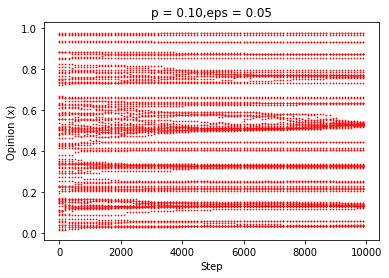

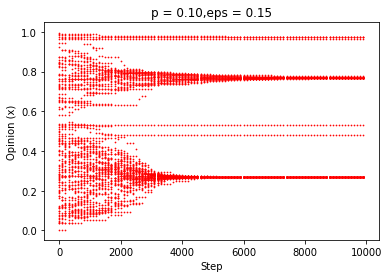

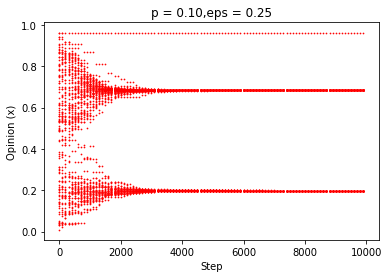

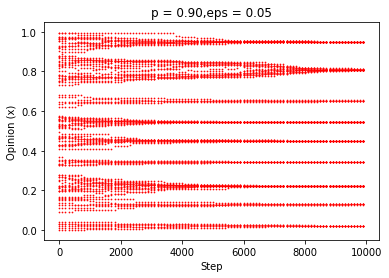

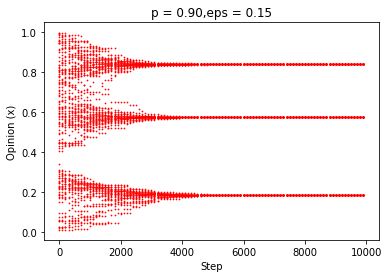

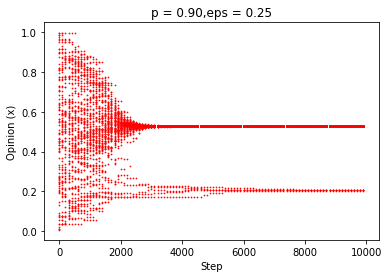

In [175]:
mu = 0.3
N = 100
num_graphs = 1
num_steps = 100*N

p_vec = [0.1,0.9]
eps_vec = [0.05,0.15,0.25]
for p in p_vec:
    for eps in eps_vec:
        
        # generate graphs
        ER_graphs = []
        num_graphs_iter = 0
        while num_graphs_iter < num_graphs:
            graph_adj_list = generate_ER_graph(N,p)
            if is_connected(N,graph_adj_list):
                ER_graphs.append(graph_adj_list) 
                num_graphs_iter += 1

        num_cluster_vec = []
        graph = ER_graphs[0]
        x = np.random.uniform(size=N)
        plt.figure()
        for step in range(num_steps):
            x = evolve_model(x,mu,eps,N,graph)
            if step % 100 == 0:
                plt.scatter([step]*len(x),x,s=0.5,c='r')
            plt.title("p = {:.2f},eps = {:.2f}".format(p,eps))
            plt.xlabel("Step")
            plt.ylabel("Opinion (x)")



## (c)

As $p \rightarrow 1$, the graph becomes a complete graph. For a complete graph, the number of clusters is given as $\frac{1}{2\epsilon}$. This is seen in the following plot for mean number of clusters vs $\epsilon$.

Text(0,0.5,'Mean no. of clusters')

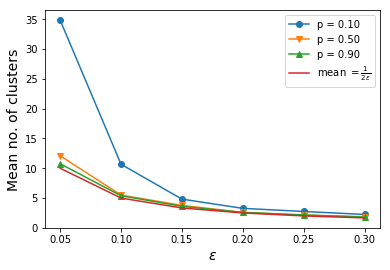

In [160]:
plt.plot(eps_vec,mean_table[0],label="p = {:.2f}".format(p_vec[0]),marker='o')
plt.plot(eps_vec,mean_table[1],label="p = {:.2f}".format(p_vec[1]),marker='v')
plt.plot(eps_vec,mean_table[2],label="p = {:.2f}".format(p_vec[2]),marker='^')
plt.plot(eps_vec,0.5/eps_vec,label=r"mean $= \frac{1}{2\epsilon}$")
plt.legend()
plt.xlabel(r"$\epsilon$",fontsize=14)
plt.ylabel("Mean no. of clusters",fontsize=14)

The standatd deviation seems to decrease towards zero (or saturate to 1, it is not really clear here) with increasing $p$.

Text(0,0.5,' Std. dev. of clusters')

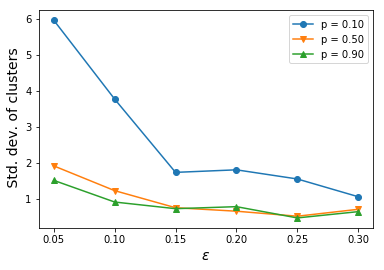

In [162]:
plt.plot(eps_vec,std_table[0],label="p = {:.2f}".format(p_vec[0]),marker='o')
plt.plot(eps_vec,std_table[1],label="p = {:.2f}".format(p_vec[1]),marker='v')
plt.plot(eps_vec,std_table[2],label="p = {:.2f}".format(p_vec[2]),marker='^')
plt.legend()
plt.xlabel(r"$\epsilon$",fontsize=14)
plt.ylabel(" Std. dev. of clusters",fontsize=14)